In [2]:
# 학습된 모델 불러다 다시 사용
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
# 신경망 구조와 가중치를 저장하고 있는  파일을 읽어옴
cnn = tf.keras.models.load_model("/content/cnn1.h5")
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [4]:
# 데이터 확보
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
res = cnn.evaluate(x_test,y_test,verbose=2)
res

313/313 - 6s - loss: 0.6646 - accuracy: 0.7849 - 6s/epoch - 20ms/step


[0.6645742058753967, 0.7849000096321106]

In [6]:
# [0.664574146270752, 0.7849000096321106]

In [7]:
cnn.layers

In [11]:
[i.name for i in cnn.layers]

['conv2d',
 'conv2d_1',
 'max_pooling2d',
 'dropout',
 'conv2d_2',
 'conv2d_3',
 'max_pooling2d_1',
 'dropout_1',
 'flatten',
 'dense',
 'dropout_2',
 'dense_1']

In [12]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases =  layer.get_weights()
    print(layer.name, kernel.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [27]:
#맨 앞의 있는 컨볼류션층의 커널 정보를 추출
kernel, biases =  cnn.layers[0].get_weights()

In [16]:
minv, maxv =  kernel.min(),kernel.max()

In [30]:
# 커널의 값을 표준화  minmax scaler
kernel = (kernel - minv ) / (maxv - minv)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
kernel.shape

(3, 3, 3, 32)

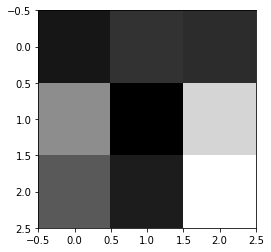

In [38]:

# temp = kernel[:,:,0,0] ~ temp = kernel[:,:,0,31]
temp = kernel[:,:,0,0]
plt.imshow(temp,cmap='gray')

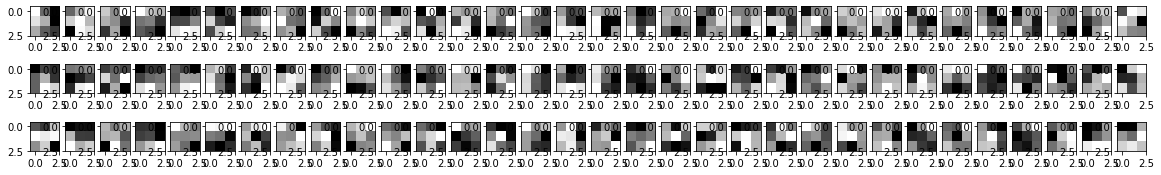

In [50]:
# (3, 3, 3, 32)
# fig,ax =  plt.subplots(3,32,figsize=(10,10) )
plt.figure(figsize=(20,3))
for i in range(32):  
  f = kernel[:,:,:,i]
  for j in range(3):    
    plt.subplot(3,32,j*32+i+1)
    temp = f[:,:,j]
    plt.imshow(temp,cmap='gray')



In [48]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases =  layer.get_weights()
    print(layer.name, kernel.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [ ]:
for i in range(32):
  for j in range(3):
    print(j*32+i+1)

In [51]:
# 신경망의 특징 맵을 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)

conv2d (None, 30, 30, 32)
conv2d_1 (None, 28, 28, 32)
conv2d_2 (None, 12, 12, 64)
conv2d_3 (None, 10, 10, 64)


In [52]:
# 0번째 층을 따로 테어내서 객체에 저장
from tensorflow.keras.models import Model

In [54]:
m =  Model(inputs = cnn.inputs, outputs=cnn.layers[0].output)
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [56]:
freature_map = m.predict(x_test)

In [69]:
fm = freature_map[0]

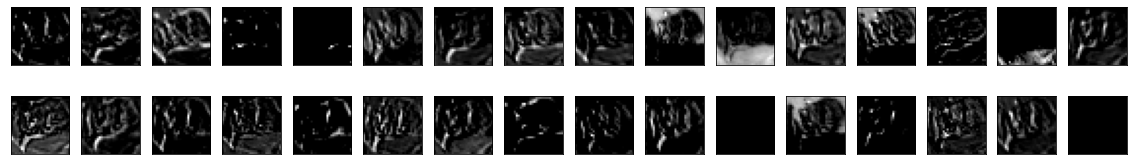

In [72]:
plt.figure(figsize=(20,3))
for i in range(32):
  plt.subplot(2,16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([]); plt.yticks([])

In [73]:
# 딥러닝의 전략
# 충분히 큰 신경망 구조를 사용하되.. 다양한 규제 기법을 적용하여 과잉 적합을 방지
# 데이터 증대, 드랍아웃, 가충치감쇠, 앙상블, 배치 정규화등의 다양한 규제 기법이 있음

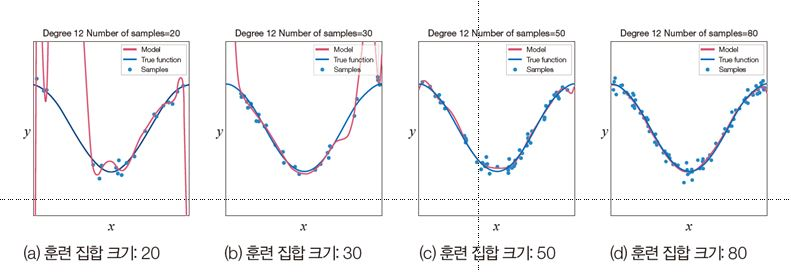

In [77]:
from IPython import display
display.Image('/content/033.JPG')

In [78]:
# 데이터를 늘리는 행위는 비용증가
# 딥러닝에서는 주어진 데이터를 인위적으로 늘리는 데이터 증대( data augmentation)를 적용
# 영상을 이동, 회전, 또는 좌우반전
# 명암조정 등....
# 텐서플로에서 제공하는 라이브러리를이용

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
xx_train, yy_train = x_train[:12], y_train[:12]

In [89]:
xx_train.shape , yy_train.shape

((12, 32, 32, 3), (12, 10))

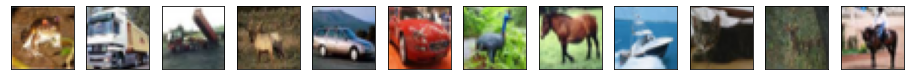

In [90]:
plt.figure(figsize=(16,2))
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(xx_train[i])
  plt.xticks([]);plt.yticks([])  

In [91]:
generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [92]:
gen = generator.flow(xx_train,yy_train,batch_size=6)

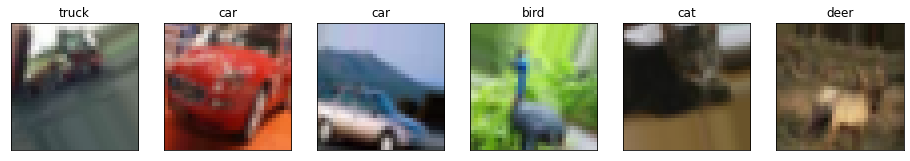

In [105]:
cls_name = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label =  gen.next() # 함수를 호출할때마다 Batch_size 매개변수가 지정한 수 만큼 영상 생성
plt.figure(figsize=(16,3))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.imshow(img[i])
  plt.xticks([]); plt.yticks([])
  plt.title( cls_name[np.argmax(label[i])]  )

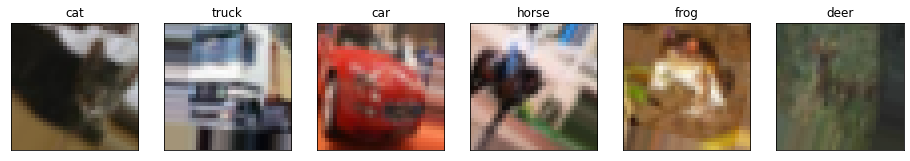

In [106]:
img, label =  gen.next() # 함수를 호출할때마다 Batch_size 매개변수가 지정한 수 만큼 영상 생성
plt.figure(figsize=(16,3))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.imshow(img[i])
  plt.xticks([]); plt.yticks([])
  plt.title( cls_name[np.argmax(label[i])]  )

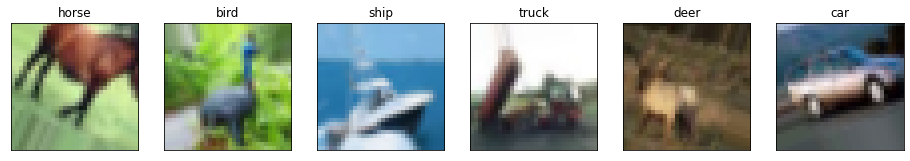

In [107]:
img, label =  gen.next() # 함수를 호출할때마다 Batch_size 매개변수가 지정한 수 만큼 영상 생성
plt.figure(figsize=(16,3))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.imshow(img[i])
  plt.xticks([]); plt.yticks([])
  plt.title( cls_name[np.argmax(label[i])]  )

In [108]:
# 증대된 영상으로 신경망 학습

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# 데이터 확보
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [111]:
#신경망 모델 설계  CCPD CCPD F FC D FC
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape = (32, 32, 3)  ))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu' ))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))


In [ ]:
# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])
batch_size = 128
generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
hist = cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_size)
,epochs=50,validation_data=(x_test,y_test),verbose=2)